In [1]:
!pip install joblib


In [2]:
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import time
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [11]:
class MachineLearning():

    def __init__(self):
        print("Initializing ML Workflow...")

    def load_and_preprocess_data(self, file_path='FlowStatsfile.csv'):
        """ Load and preprocess the dataset """
        print("Loading dataset ...")
        
        self.flow_dataset = pd.read_csv(file_path)

        # Clean numerical columns (remove periods)
        self.flow_dataset.iloc[:, 2] = self.flow_dataset.iloc[:, 2].str.replace('.', '')
        self.flow_dataset.iloc[:, 3] = self.flow_dataset.iloc[:, 3].str.replace('.', '')
        self.flow_dataset.iloc[:, 5] = self.flow_dataset.iloc[:, 5].str.replace('.', '')

        # Exclude the 'flags' feature (assuming 'flags' is the name of the feature you want to exclude)
        # You can update this line if the 'flags' feature has a different name in your dataset
        self.flow_dataset = self.flow_dataset.drop(columns=['flags'])

        # Convert data to float for model input
        self.X_flow = self.flow_dataset.iloc[:, :-1].values
        self.X_flow = self.X_flow.astype('float64')

        self.y_flow = self.flow_dataset.iloc[:, -1].values

        print(f"Data loaded and preprocessed. Shape of data: {self.X_flow.shape}")

    def split_data(self, test_size=0.25):
        """ Split data into training and test sets """
        print("Splitting data into training and test sets ...")
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X_flow, self.y_flow, test_size=test_size, random_state=0)
        print(f"Training data: {self.X_train.shape}, Test data: {self.X_test.shape}")

    def train_model(self, n_estimators=10, criterion="entropy"):
        """ Train the Random Forest model and measure training time """
        print(f"Training Random Forest model with {n_estimators} estimators ...")

        # Record the start time
        start_time = time.time()

        # Train the model
        self.classifier = RandomForestClassifier(
            n_estimators=n_estimators, criterion=criterion, random_state=0)
        self.model = self.classifier.fit(self.X_train, self.y_train)

        # Record the end time
        end_time = time.time()
        
        # Calculate and print the training time
        training_time = end_time - start_time
        print("Model trained successfully.")
        
        print(f"Model trained successfully in {training_time:.2f} seconds.")

    def evaluate_model(self):
        """ Evaluate the model using different metrics """
        print("Evaluating model ...")
        
        y_pred = self.model.predict(self.X_test)

        # Confusion Matrix
        cm = confusion_matrix(self.y_test, y_pred)
        print(f"Confusion Matrix:\n{cm}")

        # Metrics
        acc = accuracy_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)

        return cm, acc, precision, recall, f1

    def save_model(self, filename='random_forest_model.joblib'):
        """ Save the trained model to a file """
        print(f"Saving model to {filename} ...")
        joblib.dump(self.model, filename)
        print(f"Model saved successfully to {filename}.")

    def plot_confusion_matrix(self, cm):
        """ Plot the confusion matrix as a bar chart """
        print("Plotting confusion matrix ...")
        
        x = ['TP', 'FP', 'FN', 'TN']
        plt.title("Random Forest Confusion Matrix")
        plt.xlabel('Class Prediction')
        plt.ylabel('Number of Flows')
        plt.tight_layout()
        plt.style.use("ggplot")
        y = [cm[0][0], cm[0][1], cm[1][0], cm[1][1]]
        plt.bar(x, y, color="#000000", label='RF')
        plt.legend()
        plt.show()

In [12]:
# Instantiate the class and call methods|
ml = MachineLearning()
start = datetime.now()

Initializing ML Workflow...


In [13]:
# 1. Load and preprocess the dataset
ml.load_and_preprocess_data()

Loading dataset ...
Data loaded and preprocessed. Shape of data: (2667523, 20)


In [14]:
# 2. Split the data into train and test sets
ml.split_data()

Splitting data into training and test sets ...
Training data: (2000642, 20), Test data: (666881, 20)


In [15]:
# 3. Train the Random Forest model
ml.train_model()

Training Random Forest model with 10 estimators ...
Model trained successfully.
Model trained successfully in 37.00 seconds.


In [16]:
# 4. Evaluate the model and get metrics
cm, acc, precision, recall, f1 = ml.evaluate_model()

Evaluating model ...
Confusion Matrix:
[[226596      0]
 [     3 440282]]


In [17]:
# 5. Save the model
ml.save_model()

Saving model to random_forest_model.joblib ...
Model saved successfully to random_forest_model.joblib.


Plotting confusion matrix ...


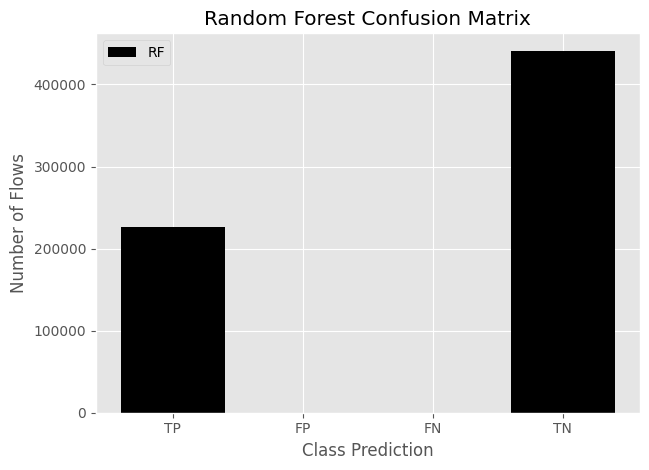

Total training time:  0:01:17.119852


In [18]:
# 6. Plot the confusion matrix
ml.plot_confusion_matrix(cm)

end = datetime.now()
print("Total training time: ", (end-start))